In [1]:
import pymatgen as mg
from pymatgen import Element, Composition
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
structs=pickle.load(open('struct_all.pickle', 'rb'))

In [3]:
valencies=pickle.load(open('val_all.pickle', 'rb'))

In [4]:
s1=structs[0].copy()


In [46]:
a=s1.sites

#pts=s1.get_sites_in_sphere([,15)
#s1.sites
a

[PeriodicSite: Nb (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
 PeriodicSite: Ag (2.0120, 2.0120, 2.0120) [0.5000, 0.5000, 0.5000],
 PeriodicSite: O (2.0120, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000],
 PeriodicSite: O (-0.0000, 2.0120, 0.0000) [0.0000, 0.5000, 0.0000],
 PeriodicSite: O (0.0000, 0.0000, 2.0120) [0.0000, 0.0000, 0.5000]]

In [49]:
from collections import Counter

In [58]:
a=s1.sites
b=a[0]

In [61]:
b.specie

Element Nb

In [68]:
a=['a','b','c']
[a.index(entry) for entry in a if entry=='b'][0]

1

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


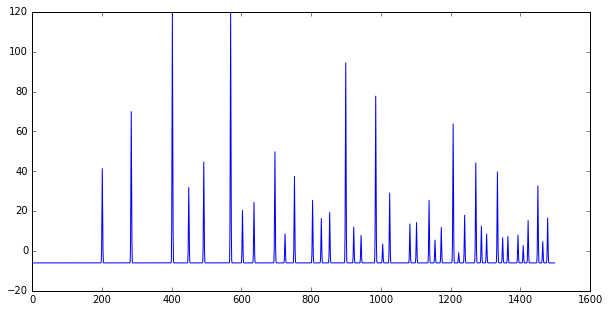

In [241]:
s1=structs[0].copy()
spec=s1.species
rmax=15
delta=0.01
Kernsize=6
sig=0.01
n_bins=rmax/delta
plot_max=n_bins-1
count=Counter(spec)
els=[a.name for a in count.keys()]
finger=np.zeros((9,n_bins+Kernsize),dtype=float)
vol=s1.volume
prefac=1.0/(np.sqrt(2*np.pi*sig*sig))
kern=np.array([prefac*(np.exp(-(i*delta)*(i*delta)/(2*sig*sig))) for i in range(-1*Kernsize,Kernsize+1)])
for i,s in enumerate(spec):
    ind1=[els.index(entry) for entry in els if entry==s.name][0]
    N_i=count[s]
    #print N_i,i,s
    list_at=s1.get_sites_in_sphere(s1.sites[i].coords,rmax)
    dists=np.array([entry[-1] for entry in list_at if entry[-1]>0.1])
    names=[entry[0].specie for entry in list_at if entry[-1]>0.1]
    count2=Counter(names)
    for j,dist in enumerate(dists):
        N_j=count2[names[j]]
        ind2=[els.index(entry) for entry in els if entry==names[j].name][0]
        if (ind2>=ind1):
            poin=np.floor(dist/delta)
            finger[ind1*3+ind2][poin-Kernsize:poin+Kernsize+1]+=((vol)/(4*np.pi*dist*dist*N_i*N_j*delta))*kern
fing_sum=finger[0]+finger[1]+finger[2]+finger[4]+finger[5]+finger[8]-6    
plt.figure(figsize=(10,5))
plt.plot(fing_sum[0:n_bins-1])        
    
    
    

array([  2.76535477e-48,   2.34759768e-33,   3.84729931e-21,
         1.21716027e-11,   7.43359757e-05,   8.76415025e-01,
         1.99471140e+01,   8.76415025e-01,   7.43359757e-05,
         1.21716027e-11,   3.84729931e-21,   2.34759768e-33,
         2.76535477e-48])

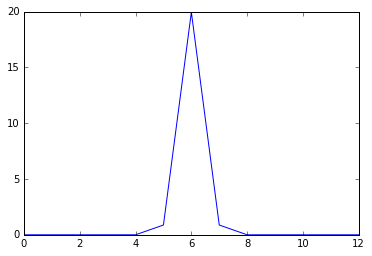

In [225]:
plt.plot(kern)
kern